<a href="https://colab.research.google.com/github/bmalenovska/Homeworks/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd #for analysis
import matplotlib.pyplot as plt # for visualization

In [91]:
titanic_df = pd.read_csv('/content/titanic.csv') #renaming our dataset, reading and defining location

In [27]:
# Display the first few rows to get an overview of the data structure.
titanic_df.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [12]:
# Check the dimensions of the dataset (number of rows and columns).
rows, columns = titanic_df.shape
print(f'Number of rows is {rows}, number of columns is {columns}')

Number of rows is 891, number of columns is 12


In [9]:
# Check the total count of missing values in each column
print(titanic_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [18]:
# Dropping rows and columns with missing values
titanic_df.dropna()
titanic_df.dropna(inplace=True)

In [25]:
titanic_df.describe()
titanic_df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,183,183,183,183,183
unique,183,2,127,133,3
top,"Cumings, Mrs. John Bradley (Florence Briggs Th...",male,113760,G6,S
freq,1,95,4,4,116


In [30]:
# Compute basic statistics (e.g., mean, median, min, max) for numerical columns.
mean_values = titanic_df.mean(numeric_only=True)
median_values = titanic_df.median(numeric_only=True)
min_values = titanic_df.min(numeric_only=True)
max_values = titanic_df.max(numeric_only=True)

stats_df = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Min': min_values,
    'Max': max_values
})
print("\nBasic Statistics for Numerical Columns:\n", stats_df)


Basic Statistics for Numerical Columns:
                    Mean  Median   Min       Max
PassengerId  455.366120   457.0  2.00  890.0000
Survived       0.672131     1.0  0.00    1.0000
Pclass         1.191257     1.0  1.00    3.0000
Age           35.674426    36.0  0.92   80.0000
SibSp          0.464481     0.0  0.00    3.0000
Parch          0.475410     0.0  0.00    4.0000
Fare          78.682469    57.0  0.00  512.3292


In [33]:
# Analyze categorical variables (e.g., value counts).
categorical_columns = titanic_df.select_dtypes(include=['object', 'category', 'bool']).columns
print("Categorical Columns:\n", categorical_columns)

Categorical Columns:
 Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [59]:
titanic_df.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [60]:
# Value counts for Age
titanic_df['Age'].value_counts().reset_index()

,Age,count
0,36.0,11
1,24.0,9
2,19.0,6
3,35.0,6
4,31.0,5
...,...,...
58,71.0,1
59,3.0,1
60,1.0,1
61,36.5,1


In [39]:
# Value counts for all categorical columns
for column in categorical_columns:
    print(f"\nValue Counts for '{column}':\n", titanic_df[column].value_counts().reset_index())


Value Counts for 'Name':
                                                   Name  count
0    Cumings, Mrs. John Bradley (Florence Briggs Th...      1
1        Appleton, Mrs. Edward Dale (Charlotte Lamson)      1
2            Silvey, Mrs. William Baird (Alice Munger)      1
3    Thayer, Mrs. John Borland (Marian Longstreth M...      1
4                                  Ross, Mr. John Hugo      1
..                                                 ...    ...
178                            Ball, Mrs. (Ada E Hall)      1
179                       Hippach, Miss. Jean Gertrude      1
180                                Partner, Mr. Austen      1
181                          Graham, Mr. George Edward      1
182                              Behr, Mr. Karl Howell      1

[183 rows x 2 columns]

Value Counts for 'Sex':
       Sex  count
0    male     95
1  female     88

Value Counts for 'Ticket':
        Ticket  count
0      113760      4
1       19950      4
2    PC 17582      3
3       35273  

In [63]:
titanic_df.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


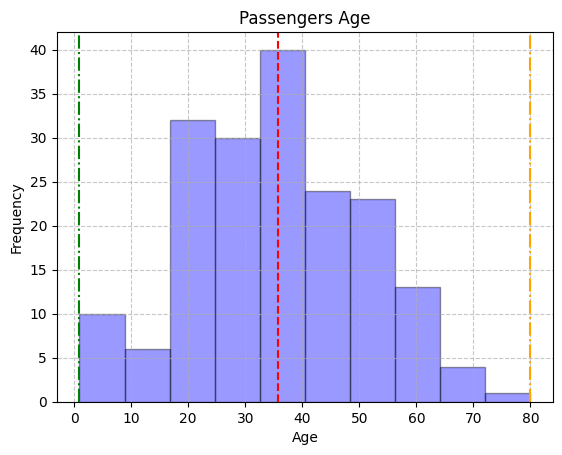

In [64]:
# Choose one column of the dataset that interests you
# Use Matplotlib pyplot to create a meaningful visualization:
# Histogram

plt.hist(titanic_df['Age'], color='blue', edgecolor='black', alpha=0.4)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Passengers Age')

#avg line
plt.axvline(titanic_df['Age'].mean(), linestyle='dashed', color='red')

#min line
plt.axvline(titanic_df['Age'].min(), linestyle='dashdot', color='green')

#max line
plt.axvline(titanic_df['Age'].max(), linestyle='dashdot', color='orange')

plt.grid(linestyle='--', alpha=0.7)